<a href="https://colab.research.google.com/github/MrCherveN/Machine-Learning--4-0_HomeTasks/blob/main/HW_2_1_%D0%9B%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F_%D0%B2%D1%96%D0%B4_%D0%B1%D0%B0%D0%B3%D0%B0%D1%82%D1%8C%D0%BE%D1%85_%D0%B7%D0%BC%D1%96%D0%BD%D0%BD%D0%B8%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  root_mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Python/Machine Learning для людей  4.0/Модуль 2. Навчання з учителем/Тема 2.1 Лінійна регресія. Методи оцінки точності прогностичної моделі/data/cars.csv')

In [4]:
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [5]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
?pd.DataFrame.info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [7]:
for col in df.columns:
    print(f"\nКолонка: {col}")
    print(f"Тип даних: {df[col].dtype}")
    print(f"Кількість унікальних значень: {df[col].nunique()}")
    print("Унікальні значення значення:")
    print(df[col].unique())


Колонка: Car_ID
Тип даних: int64
Кількість унікальних значень: 100
Унікальні значення значення:
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]

Колонка: Brand
Тип даних: object
Кількість унікальних значень: 11
Унікальні значення значення:
['Toyota' 'Honda' 'Ford' 'Maruti' 'Hyundai' 'Tata' 'Mahindra' 'Volkswagen'
 'Audi' 'BMW' 'Mercedes']

Колонка: Model
Тип даних: object
Кількість унікальних значень: 58
Унікальні значення значення:
['Corolla' 'Civic' 'Mustang' 'Swift' 'Sonata' 'Nexon' 'Scorpio' 'Polo'
 'A4' 'X1' 'C-Class' 'Endeavour' 'Creta' 'Harrier' 'Ertiga' 'City'
 'Tiguan' 'Q3' '5 Series' 'GLC' 'Innova' 'Figo' 'Verna' 'Altroz' 

In [8]:
for col in df.select_dtypes(include='object').columns:
    print(f"\nКолонка: {col}")
    print(df[col].value_counts())


Колонка: Brand
Brand
Ford          11
Tata          11
Hyundai       11
BMW           10
Toyota        10
Audi          10
Volkswagen    10
Mercedes      10
Honda          6
Maruti         6
Mahindra       5
Name: count, dtype: int64

Колонка: Model
Model
Mustang          3
C-Class          3
Altroz           3
Verna            3
Passat           2
Thar             2
T-Roc            2
BR-V             2
S-Cross          2
Tigor            2
Santro           2
Ranger           2
Yaris            2
GLE              2
7 Series         2
A3               2
Ameo             2
WR-V             2
Vitara           2
Safari           2
Elantra          2
Aspire           2
Fortuner         2
E-Class          2
X3               2
A6               2
Venue            2
Tiago            2
XUV300           2
Vento            2
Q7               2
X5               2
GLA              2
Camry            2
A5               2
3 Series         2
Innova Crysta    2
EcoSport         2
5 Series         1
GL

***Висновок***

В наборі даних 8 числових і 5 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 2 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 1 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [9]:
targets = df['Price']
inputs = df.drop('Price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=12)

print(f"Тренувальні дані - кількість записів: {len(y_train)}")
print(f"Тестові дані - кількість записів: {len(y_test)}")

Тренувальні дані - кількість записів: 80
Тестові дані - кількість записів: 20


**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [10]:
#1 Закодуйте колонки з бінарними значеннями Fuel_Type і Transmission
# виконаємо автоматичний пошук категорії, яка  містить більше значень (на випадок зміни датасету)

Fuel_Type_max = X_train['Fuel_Type'].value_counts().idxmax()
Transmission_max = X_train['Transmission'].value_counts().idxmax()
print(f'Fuel_Type_max - {Fuel_Type_max}')
print(f'Transmission_max - {Transmission_max}')

Fuel_Type_codes = {val: int(val == Fuel_Type_max) for val in X_train['Fuel_Type'].unique()}
Transmission_codes = {val: int(val == Transmission_max) for val in X_train['Transmission'].unique()}
print(f'\nFuel_Type_codes - {Fuel_Type_codes}')
print(f'Transmission_codes - {Transmission_codes}')

Fuel_Type_max - Petrol
Transmission_max - Automatic

Fuel_Type_codes - {'Petrol': 1, 'Diesel': 0}
Transmission_codes - {'Automatic': 1, 'Manual': 0}


In [11]:

X_train['Fuel_Type_code'] = X_train['Fuel_Type'].map(Fuel_Type_codes)
X_train['Transmission_code'] = X_train['Transmission'].map(Transmission_codes)

X_test['Fuel_Type_code'] = X_test['Fuel_Type'].map(Fuel_Type_codes)
X_test['Transmission_code'] = X_test['Transmission'].map(Transmission_codes)

In [12]:
#2 Закодуйте колонку Brand з використанням sklearn.preprocessing.OneHotEncoder
enc = preprocessing.OneHotEncoder()
enc.fit(X_train[['Brand']])
enc.categories_

[array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
        'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)]

In [13]:
one_hot = enc.transform(X_train[['Brand']]).toarray()
X_train[enc.categories_[0]] = one_hot

In [14]:
one_hot = enc.transform(X_test[['Brand']]).toarray()
X_test[enc.categories_[0]] = one_hot

In [15]:
#3 Колонку Owner_Type з використанням sklearn.preprocessing.OrdinalEncoder я закодую для вас.
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [16]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [17]:
X_train_number = pd.concat([X_train.select_dtypes(include='number'), y_train], axis=1)
X_train_number.head(3)

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Price
83,84,2019,22000,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1600000
55,56,2018,28000,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2600000
26,27,2018,28000,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3200000


In [18]:
concat_corr = X_train_number.corr()
concat_corr

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Price
Car_ID,1.000000,0.137027,-0.356614,0.100891,-0.089284,-0.006319,-0.063793,0.090537,-0.084381,0.089473,0.048335,-0.020240,-0.050809,0.016831,0.006797,-0.054463,-0.045431,-0.032926,0.011350,0.020129,0.038923,0.025560
Year,0.137027,1.000000,-0.708525,0.278559,-0.392764,-0.248442,-0.278755,0.248515,-0.200603,-0.256523,0.202517,-0.150454,-0.037437,-0.092099,0.181669,0.285094,-0.115157,0.248715,-0.219346,0.018255,-0.014499,-0.233769
Kilometers_Driven,-0.356614,-0.708525,1.000000,-0.126621,0.101219,-0.060803,0.403656,-0.332351,-0.066491,0.095879,-0.247042,-0.009761,0.057372,0.154362,-0.040344,-0.190420,-0.091731,0.030399,0.368519,-0.137675,-0.001772,-0.083951
Mileage,0.100891,0.278559,-0.126621,1.000000,-0.710516,-0.684705,-0.178619,-0.070112,-0.399164,-0.152701,-0.134105,-0.296480,0.358630,0.217406,0.029427,0.116389,-0.238489,0.347678,-0.201565,0.085114,0.026624,-0.638404
Engine,-0.089284,-0.392764,0.101219,-0.710516,1.000000,0.801638,0.167326,-0.174455,0.456296,0.085153,0.287119,0.184231,-0.154491,-0.182213,-0.024973,-0.193257,0.163871,-0.340051,0.234889,-0.165115,-0.196106,0.710561
Power,-0.006319,-0.248442,-0.060803,-0.684705,0.801638,1.000000,-0.139388,0.076357,0.586910,0.157050,0.372652,0.240501,-0.191810,-0.170966,-0.118021,-0.220984,0.280827,-0.316989,-0.040478,-0.148437,-0.204309,0.849137
Seats,-0.063793,-0.278755,0.403656,-0.178619,0.167326,-0.139388,1.000000,-0.412468,-0.070099,0.123674,-0.108079,-0.161451,0.200303,-0.086439,0.007738,-0.078379,-0.108079,-0.012748,0.348535,-0.094002,-0.043849,0.000979
Fuel_Type_code,0.090537,0.248515,-0.332351,-0.070112,-0.174455,0.076357,-0.412468,1.000000,-0.005775,-0.008336,-0.048475,0.109812,-0.161425,-0.007121,-0.235225,0.148511,-0.048475,0.066164,-0.008336,0.125010,0.281122,-0.110782
Transmission_code,-0.084381,-0.200603,-0.066491,-0.399164,0.456296,0.586910,-0.070099,-0.005775,1.000000,0.265132,0.283188,-0.122816,-0.218620,0.031659,-0.170703,-0.112622,0.283188,-0.397609,-0.076974,0.155500,0.005886,0.680731
Audi,0.089473,-0.256523,0.095879,-0.152701,0.085153,0.157050,0.123674,-0.008336,0.265132,1.000000,-0.118678,-0.118678,-0.086066,-0.094916,-0.076472,-0.086066,-0.118678,-0.125988,-0.111111,-0.103221,-0.203925,0.328858


***Висновок***

- Power (0.85) -  Потужність двигуна має найвище значення кореляції, тому можна
зробити висновок, що значення в цьому полі має найвищий вплив на визначення таргетної колонки.

- Engine (0.71) - Об'єм двигуна займає друге мсіце значенню коефіцієнта кореляції з таргетною колонкою. Отримане значення говорить нам, що об'єм двигуна також впливає на визначення ціни автомобіля.

- Transmission_code (0.68) - Тип трансмісії в значній мірі впливає на визначення  ціни автомобіля.

- Mileage (-0.64) - Паливна ефективність автомобіля у кілометрах на літр має сильний зворотний зв'язок із ціною ціною автомобіля.

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [19]:
X_train = X_train.select_dtypes(include='number')
X_test = X_test.select_dtypes(include='number')

model = LinearRegression().fit(X_train, y_train)
predictions_train = model.predict(X_train)
rmse_train = root_mean_squared_error(y_train, predictions_train)
print(f'RMSE_train = {rmse_train}')

predictions_test = model.predict(X_test)
rmse_test = root_mean_squared_error(y_test, predictions_test)
print(f'RMSE_test = {rmse_test}')

RMSE_train = 210293.57828151877
RMSE_test = 258181.56112032934


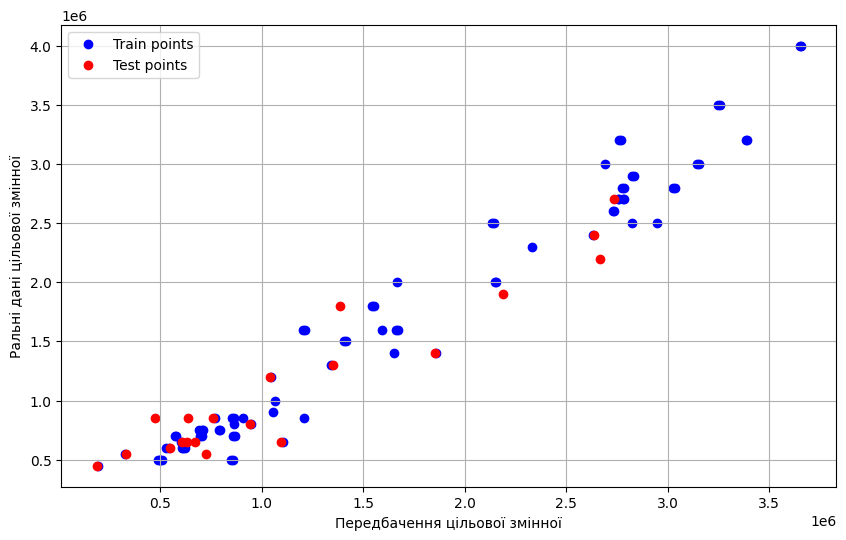

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(predictions_train, y_train, color='blue', label='Train points')
plt.scatter(predictions_test, y_test, color='red', label='Test points')
plt.xlabel('Передбачення цільової змінної')
plt.ylabel('Ральні дані цільової змінної')
plt.legend()
plt.grid(True)
plt.show()

***Висновок:***

Побудована модель лінійної регресії демонструє високу якість. Побудований графік демонструє розташування точок розсіювання передбачень проти реальних даних цільової змінної вздовж діагональної лінії. Значення RMSE на обох наборах даних є схожими. Незначне перевищення RMSE по тестовому набору є некритичним, враховуючи розкид ціна на автомобілі.

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [21]:
numeric_cols =  df.drop('Price', axis=1).select_dtypes(include='number').columns.tolist()
numeric_cols

['Car_ID', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']

In [22]:
# масштабування незалежних змінних X_train (лише в частині первісночислових значень)
scaler = StandardScaler()
scaler.fit(X_train[numeric_cols])

scaled_inputs_train = scaler.transform(X_train[numeric_cols])
scaled_inputs_train[10]

array([ 1.02017437,  1.4610675 , -1.45726503,  0.27486176, -0.68330971,
       -0.78463436, -0.30356247])

In [23]:
#первіснокатегоріальні колонки
cat_cols = X_train.columns.difference(numeric_cols)
cat_cols

Index(['Audi', 'BMW', 'Ford', 'Fuel_Type_code', 'Honda', 'Hyundai', 'Mahindra',
       'Maruti', 'Mercedes', 'Owner_Type_Codes', 'Tata', 'Toyota',
       'Transmission_code', 'Volkswagen'],
      dtype='object')

In [24]:
categorical_data_train = X_train[cat_cols].values

Поєднаємо масштабовані числові колонки з категоріальними даними.

In [25]:
inputs_train = np.concatenate((scaled_inputs_train, categorical_data_train), axis=1)

In [26]:
model = LinearRegression().fit(inputs_train, y_train)
predictions_train_scaled = model.predict(inputs_train)
rmse_train_scaled = root_mean_squared_error(y_train, predictions_train_scaled)
print(f'RMSE_train_scaled = {rmse_train_scaled}')

RMSE_train_scaled = 210293.57828151857


In [27]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols.tolist(), 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
21,1,1.601956e+06
7,Audi,7.569974e+05
15,Mercedes,7.364157e+05
8,BMW,7.312208e+05
5,Power,4.967692e+05
19,Transmission_code,2.395294e+05
18,Toyota,1.243492e+05
16,Owner_Type_Codes,6.476399e+04
0,Car_ID,5.608685e+03
6,Seats,-2.148925e+03


In [28]:
scaled_inputs_test = scaler.transform(X_test[numeric_cols])
scaled_inputs_test[10]

array([-1.42081502,  0.56881254, -0.69387081, -0.31151   , -0.63001387,
       -0.66181936, -0.30356247])

In [29]:
categorical_data_test= X_test[cat_cols].values

In [30]:
inputs_test= np.concatenate((scaled_inputs_test, categorical_data_test), axis=1)

In [31]:
predictions_test_scaled = model.predict(inputs_test)
rmse_test_scaled = root_mean_squared_error(y_test, predictions_test_scaled)
print(f'RMSE_test_scaled = {rmse_test_scaled}')

RMSE_test_scaled = 258181.5611203274


***Висновки:***

З таблиці вагів коефіцієнтів бачимо, що перші місця займають автомобілі преміального класу (Audi, Mercedes,BMW), що логічно, оскільки ціна на них вискока. Далі на ріст ціни впливають значення потужності автомобіля(Power) та типу трансмісії (Transmission_code - автоматична).
Аналогічно можна побачити, що ціна буде падати на автомобілі дешевого сегменту та типу палива (бензин).


**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [32]:
inputs_train_df = pd.DataFrame(inputs_train, columns=X_train.columns)

In [33]:
inputs_train_sm = sm.add_constant(inputs_train_df)
model = sm.OLS(y_train.reset_index(drop=True), inputs_train_sm)
results_train = model.fit()
results_train.params

,0
const,1.468459e+06
Car_ID,5.608685e+03
Year,-8.765646e+03
Kilometers_Driven,-9.439872e+04
Mileage,-1.317155e+05
Engine,-2.137745e+04
Power,4.967692e+05
Seats,-2.148925e+03
Fuel_Type_code,8.904937e+05
Transmission_code,8.647171e+05


In [34]:
print(results_train.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     68.35
Date:                Sun, 25 Jan 2026   Prob (F-statistic):           2.01e-33
Time:                        16:50:01   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2230.
Df Residuals:                      59   BIC:                             2280.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.468e+06   7.26e+0

***Відповідь:***
Стат значущими на рівні значущості 0.05 є наступні ознаки:
- Power
- Fuel_Type_code
- Transmission_code
- Mileage
- BMW
- Honda
- Hyundai
- Mahindra
- Maruti
- Toyota
- Volkswagen
- вільний член (константа)

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [35]:
features = [ 'Power', 'Fuel_Type_code', 'Transmission_code', 'Mileage', 'BMW', 'Honda', 'Hyundai', 'Mahindra', 'Maruti', 'Toyota', 'Volkswagen']
inputs_train_f = inputs_train_df[features]

In [36]:
inputs_train_sm_f = sm.add_constant(inputs_train_f)
model_f = sm.OLS(y_train.reset_index(drop=True), inputs_train_sm_f)
results_train_f = model_f.fit()
results_train_f.params

,0
const,1.347926e+06
Power,4.626079e+05
Fuel_Type_code,9.664675e+05
Transmission_code,1.060240e+06
Mileage,-9.871469e+04
BMW,-2.644347e+05
Honda,-3.073476e+05
Hyundai,-2.859407e+05
Mahindra,-1.178075e+05
Maruti,1.017277e+06


In [37]:
print(results_train_f.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     129.2
Date:                Sun, 25 Jan 2026   Prob (F-statistic):           4.53e-41
Time:                        16:50:01   Log-Likelihood:                -1098.0
No. Observations:                  80   AIC:                             2220.
Df Residuals:                      68   BIC:                             2248.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.348e+06   6.68e+0

***Висновки:***

- R2 трохи впав (на 0.005)
- Adj. R-squared трохи зріс (на 0.002)

Загалом враховуючи зростання Adj. R-squared, можна сказати, що модель поліпшилася.

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 8 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 8? Яку модель з останніх 3х завдань ви б лишили для використання?

In [38]:
round(results_train.pvalues, 4)

,0
const,0.0000
Car_ID,0.8686
Year,0.8860
Kilometers_Driven,0.1526
Mileage,0.0276
Engine,0.7703
Power,0.0000
Seats,0.9596
Fuel_Type_code,0.0000
Transmission_code,0.0000


In [39]:
p_value = results_train.pvalues

In [40]:
column = p_value[(p_value < 0.25) & (p_value.index != 'const')].index.tolist()
column

['Kilometers_Driven',
 'Mileage',
 'Power',
 'Fuel_Type_code',
 'Transmission_code',
 'Audi',
 'BMW',
 'Honda',
 'Hyundai',
 'Mahindra',
 'Maruti',
 'Toyota',
 'Volkswagen']

In [41]:
inputs_train_f_025 = inputs_train_df[column]

inputs_train_sm_f_025 = sm.add_constant(inputs_train_f_025)
model_f_025 = sm.OLS(y_train.reset_index(drop=True), inputs_train_sm_f_025)
results_train_f_025 = model_f_025.fit()
results_train_f_025.params

,0
const,1.410132e+06
Kilometers_Driven,-7.811157e+04
Mileage,-1.218583e+05
Power,4.667184e+05
Fuel_Type_code,9.629063e+05
Transmission_code,9.762323e+05
Audi,-5.119183e+04
BMW,-3.238180e+05
Honda,-2.646967e+05
Hyundai,-3.520439e+05


In [42]:
print(results_train_f_025.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     115.3
Date:                Sun, 25 Jan 2026   Prob (F-statistic):           4.40e-40
Time:                        16:50:01   Log-Likelihood:                -1094.8
No. Observations:                  80   AIC:                             2218.
Df Residuals:                      66   BIC:                             2251.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.41e+06   8.43e+0

***Висновки:***

- R2 трохи впав в порівнянні зі значенням в завданні №8 (на 0.001) та виріс в порівнянні з завданням №9 (на 0.004).
- Adj. R-squared в порівнянні з завданнями №8 та №9 виріс до значення 0.950, що є найкращим результатом.  

Загалом враховуючи зростання Adj. R-squared, можна сказати, що модель з завдання №10 найкраща для використання.